In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import pandas as pd
import urllib
import bleach 
from ggplot import *

crime_df = pd.read_csv("/Users/matthieuoliveira/Desktop/Spring2017/Stats/Week 9/report.csv")

In [37]:
crime_df

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
0,1975,NM00101,"Albuquerque, NM",286238.0,2383.0,30.0,181.0,1353.0,819.0,12.0,832.52,10.48,63.23,472.68,286.13
1,1975,TX22001,"Arlington, TX",112478.0,278.0,5.0,28.0,132.0,113.0,12.0,247.16,4.45,24.89,117.36,100.46
2,1975,GAAPD00,"Atlanta, GA",490584.0,8033.0,185.0,443.0,3518.0,3887.0,12.0,1637.44,37.71,90.30,717.10,792.32
3,1975,CO00101,"Aurora, CO",116656.0,611.0,7.0,44.0,389.0,171.0,12.0,523.76,6.00,37.72,333.46,146.58
4,1975,TX22701,"Austin, TX",300400.0,1215.0,33.0,190.0,463.0,529.0,12.0,404.46,10.99,63.25,154.13,176.10
5,1975,MD00301,"Baltimore County, MD",642154.0,1259.0,25.0,137.0,347.0,750.0,12.0,196.06,3.89,21.33,54.04,116.79
6,1975,MDBPD00,"Baltimore, MD",864100.0,16086.0,259.0,463.0,6309.0,9055.0,12.0,1861.59,29.97,53.58,730.12,1047.91
7,1975,MA01301,"Boston, MA",616120.0,11386.0,119.0,453.0,3036.0,7778.0,12.0,1848.02,19.31,73.52,492.76,1262.42
8,1975,NY01401,"Buffalo, NY",422276.0,3350.0,63.0,192.0,755.0,2340.0,12.0,793.32,14.92,45.47,178.79,554.14
9,1975,NC06001,"Charlotte, NC",262103.0,1937.0,68.0,71.0,976.0,822.0,12.0,739.02,25.94,27.09,372.37,313.62


In [6]:
crime_df.describe()

,report_year,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
count,2829.000000,2.760000e+03,2.794000e+03,2795.000000,2754.000000,2753.000000,2754.000000,2692.000000,2794.000000,2795.000000,2754.000000,2753.000000,2754.000000
mean,1995.000000,7.956981e+05,2.963255e+04,398.385331,416.278867,4405.146023,4000.245098,11.868871,1093.049810,15.372812,59.305167,566.595434,459.968112
std,11.834251,1.012451e+06,1.728630e+05,2281.276402,479.811934,6977.293769,8653.902965,1.118194,676.884678,12.350640,31.971570,369.436996,340.903534
min,1975.000000,1.007630e+05,1.540000e+02,1.000000,15.000000,15.000000,83.000000,0.000000,16.490000,0.210000,1.640000,1.610000,11.460000
25%,1985.000000,3.779310e+05,3.014750e+03,32.000000,176.250000,1467.000000,1032.000000,12.000000,625.082500,6.955000,35.775000,319.090000,210.242500
50%,1995.000000,5.366145e+05,5.135500e+03,64.000000,291.000000,2597.000000,1940.000000,12.000000,949.680000,11.980000,55.900000,487.480000,374.400000
75%,2005.000000,8.168558e+05,9.058500e+03,131.000000,465.000000,4556.000000,3609.750000,12.000000,1409.507500,20.230000,77.797500,728.240000,612.005000
max,2015.000000,8.550861e+06,1.932274e+06,24703.000000,3899.000000,71030.000000,107475.000000,12.000000,4352.830000,94.740000,199.300000,2368.220000,2337.520000


In [77]:
def get_table():
    state_abbrv = urllib.urlopen('https://simple.wikipedia.org/wiki/List_of_U.S._states').read()
    soup = BeautifulSoup(state_abbrv)
    state_table = soup.find("table", {"class" :"wikitable sortable"})
    return state_table

def make_year_list():
    year_list = []
    i = 1975
    while i <= 2015:
        year_list.append(i)
        i = i+1
    return year_list

def get_abbrv():
    abbrv_list = []
    for row in get_table().find_all('b'):
        cleaned = bleach.clean(row,tags=[], strip = True)
        abbrv_list.append(cleaned)
    return abbrv_list

state_abbrv = get_abbrv()


In [39]:
year_df = [crime_df[((crime_df['report_year'] == dates))] for dates in make_year_list()]
state_df = [crime_df[((crime_df['agency_jurisdiction'].str.contains(state)))] for state in get_abbrv()]
year_df[0]

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
0,1975,NM00101,"Albuquerque, NM",286238.0,2383.0,30.0,181.0,1353.0,819.0,12.0,832.52,10.48,63.23,472.68,286.13
1,1975,TX22001,"Arlington, TX",112478.0,278.0,5.0,28.0,132.0,113.0,12.0,247.16,4.45,24.89,117.36,100.46
2,1975,GAAPD00,"Atlanta, GA",490584.0,8033.0,185.0,443.0,3518.0,3887.0,12.0,1637.44,37.71,90.30,717.10,792.32
3,1975,CO00101,"Aurora, CO",116656.0,611.0,7.0,44.0,389.0,171.0,12.0,523.76,6.00,37.72,333.46,146.58
4,1975,TX22701,"Austin, TX",300400.0,1215.0,33.0,190.0,463.0,529.0,12.0,404.46,10.99,63.25,154.13,176.10
5,1975,MD00301,"Baltimore County, MD",642154.0,1259.0,25.0,137.0,347.0,750.0,12.0,196.06,3.89,21.33,54.04,116.79
6,1975,MDBPD00,"Baltimore, MD",864100.0,16086.0,259.0,463.0,6309.0,9055.0,12.0,1861.59,29.97,53.58,730.12,1047.91
7,1975,MA01301,"Boston, MA",616120.0,11386.0,119.0,453.0,3036.0,7778.0,12.0,1848.02,19.31,73.52,492.76,1262.42
8,1975,NY01401,"Buffalo, NY",422276.0,3350.0,63.0,192.0,755.0,2340.0,12.0,793.32,14.92,45.47,178.79,554.14
9,1975,NC06001,"Charlotte, NC",262103.0,1937.0,68.0,71.0,976.0,822.0,12.0,739.02,25.94,27.09,372.37,313.62


In [13]:
def del_empty_df():
    i = 0
    while i <= 50:
        if state_df[i].dropna().empty:
            del state_df[i]
        
        i = i +1


# 1975 Population of Boston and New York City

In [74]:

bos_pop= boston['population']
bos_ls = [population for population in bos_pop]
bos_ls[0]


616120.0

In [75]:
new_york = state_df[31]
nyc = new_york[((new_york['agency_jurisdiction'].str.contains("City")))]
nyc_pop= nyc['population']
nyc_ls = [population for population in nyc_pop]
nyc_ls[0]

7422506.0

# Boston Crime Data From 1975 - 2015

In [14]:
ma = state_df[12]
boston = ma[((ma['agency_jurisdiction'].str.contains("Boston")))]
print boston.head()
print boston.describe()



     report_year agency_code agency_jurisdiction  population  violent_crimes  \
7           1975     MA01301          Boston, MA    616120.0         11386.0   
76          1976     MA01301          Boston, MA    619437.0          9888.0   
145         1977     MA01301          Boston, MA    619321.0          9422.0   
214         1978     MA01301          Boston, MA    616225.0         10035.0   
283         1979     MA01301          Boston, MA    599582.0         11392.0   

     homicides  rapes  assaults  robberies  months_reported  crimes_percapita  \
7        119.0  453.0    3036.0     7778.0             12.0           1848.02   
76        81.0  392.0    3290.0     6125.0             12.0           1596.29   
145       75.0  408.0    3284.0     5655.0             12.0           1521.34   
214       72.0  475.0    3853.0     5635.0             12.0           1628.46   
283       92.0  464.0    4236.0     6600.0             12.0           1899.99   

     homicides_percapita  rapes_

# Boston Population Plot

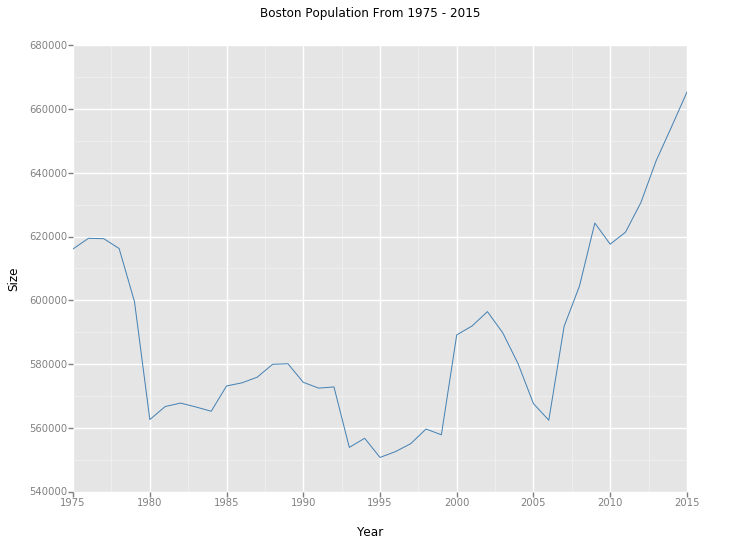

<ggplot: (294584937)>

In [15]:
ggplot(aes(x='report_year', y='population'), data=boston) + geom_line(color='steelblue', size=1) +\
xlab("Year") + ylab("Size") + ggtitle("Boston Population From 1975 - 2015")

# Boston Robberies, Violent Crime, Homicide, Rape, and Assault Plot 

count       41.000000
mean      9125.268293
std       2724.111140
min       4702.000000
25%       6956.000000
50%       9422.000000
75%      11392.000000
max      14071.000000
Name: violent_crimes, dtype: float64


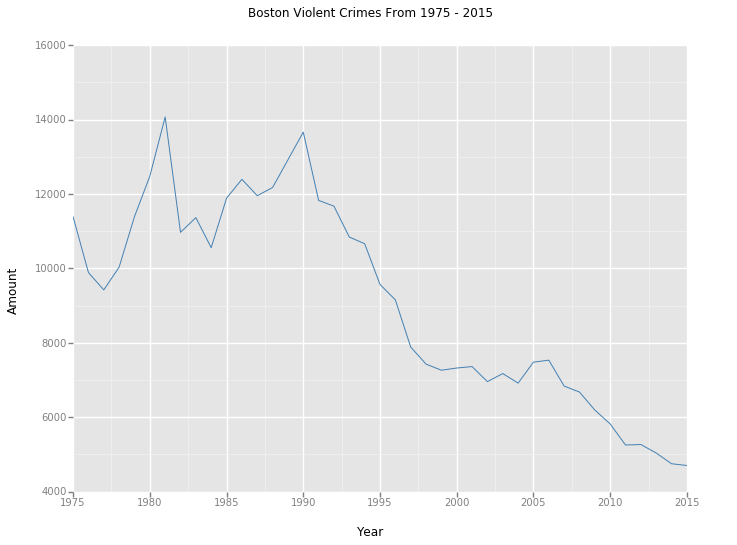

<ggplot: (294623641)>

In [16]:
violent_crime = ggplot(aes(x='report_year', y='violent_crimes'), data=boston) + geom_line(color='steelblue', size=1) +\
xlab("Year") + ylab("Amount") + ggtitle("Boston Violent Crimes From 1975 - 2015")
print boston['violent_crimes'].describe()
violent_crime

count      41.000000
mean     4503.560976
std      1132.580859
min      2736.000000
25%      3853.000000
50%      4376.000000
75%      5211.000000
max      6960.000000
Name: assaults, dtype: float64


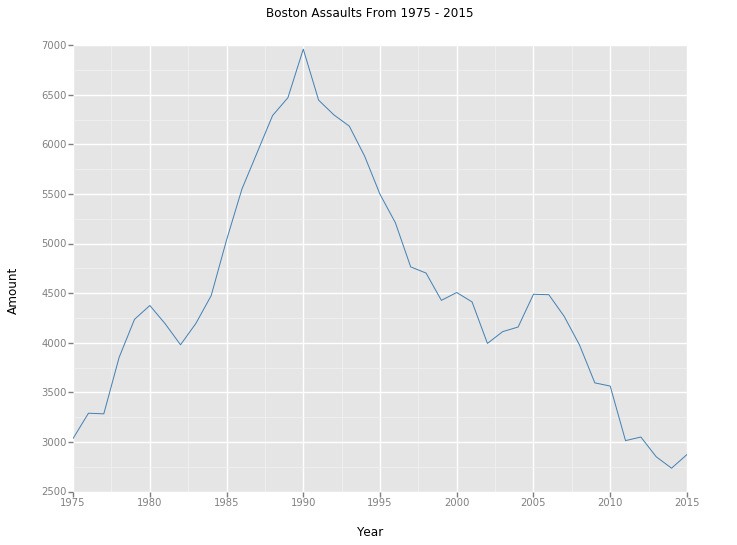

<ggplot: (291491241)>


In [17]:
assaults_plot = ggplot(aes(x='report_year', y='assaults'), data=boston) +geom_line(color='steelblue', size=1) +\
xlab("Year") + ylab("Amount") + ggtitle("Boston Assaults From 1975 - 2015")
print boston['assaults'].describe()
print assaults_plot 


count     41.000000
mean      74.219512
std       25.185822
min       31.000000
25%       59.000000
50%       73.000000
75%       92.000000
max      143.000000
Name: homicides, dtype: float64


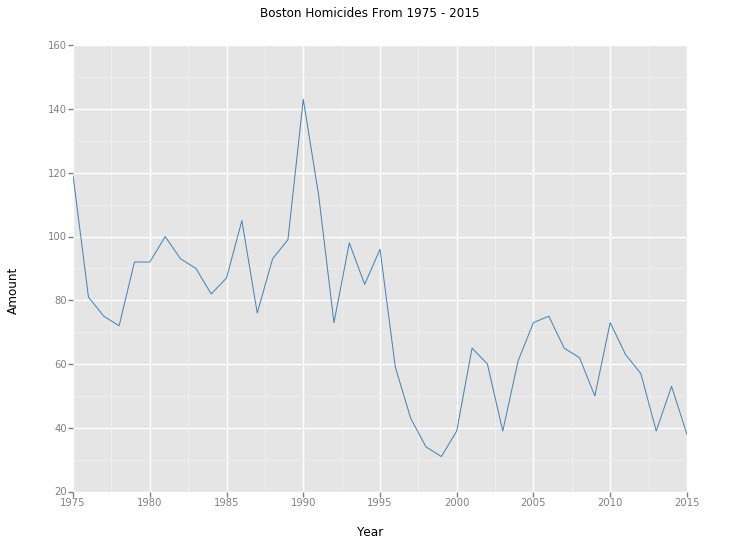

<ggplot: (294936005)>

In [18]:
homicide_plot = ggplot(aes(x='report_year', y='homicides'), data=boston) +geom_line(color='steelblue', size=1) +\
xlab("Year") + ylab("Amount") + ggtitle("Boston Homicides From 1975 - 2015")
print boston['homicides'].describe()
homicide_plot



count     41.000000
mean     386.414634
std      104.738001
min      237.000000
25%      275.000000
50%      369.000000
75%      480.000000
max      558.000000
Name: rapes, dtype: float64


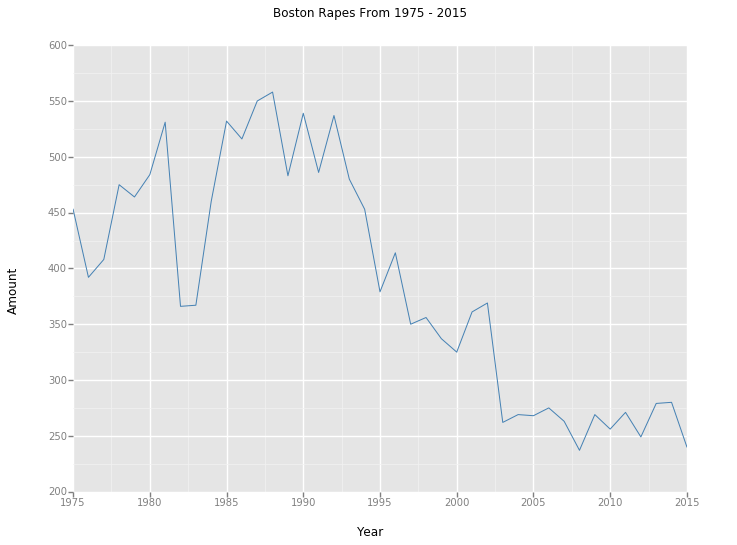

<ggplot: (294623661)>

In [19]:
rapes_plot= ggplot(aes(x='report_year', y='rapes'), data=boston) +geom_line(color='steelblue', size=1) +\
xlab("Year") + ylab("Amount") + ggtitle("Boston Rapes From 1975 - 2015")
print boston['rapes'].describe()
rapes_plot

count      41.000000
mean     4161.073171
std      2045.385739
min      1551.000000
25%      2428.000000
50%      3597.000000
75%      5866.000000
max      9248.000000
Name: robberies, dtype: float64


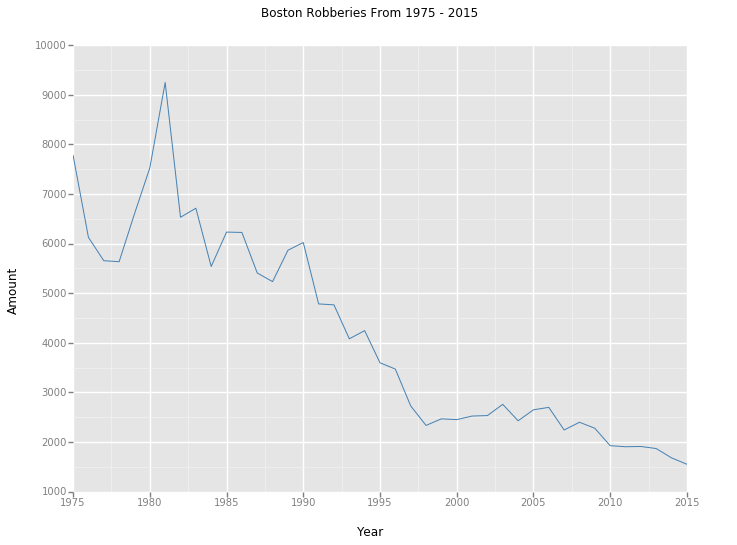

<ggplot: (299063909)>

In [20]:
robberies = ggplot(aes(x='report_year', y='robberies'), data=boston) + geom_line(color='steelblue', size=1) +\
xlab("Year") + ylab("Amount") + ggtitle("Boston Robberies From 1975 - 2015")
print boston['robberies'].describe()
robberies


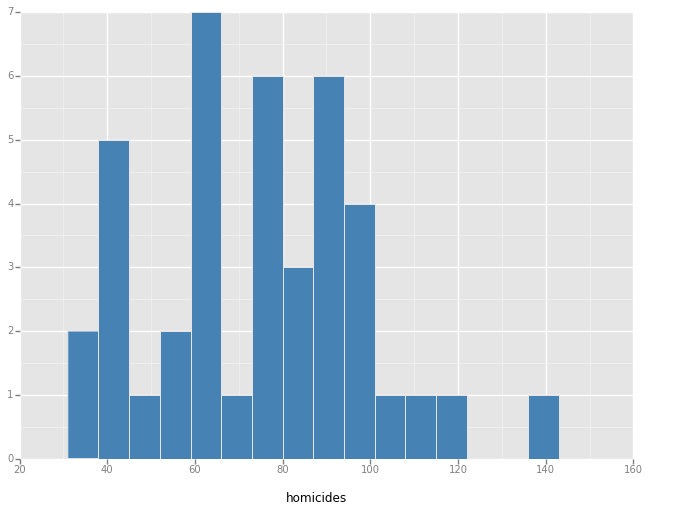

<ggplot: (299065429)>

In [21]:
p = ggplot(aes(x='homicides'), data=boston)
p + geom_histogram(fill='steelblue',binwidth=7)

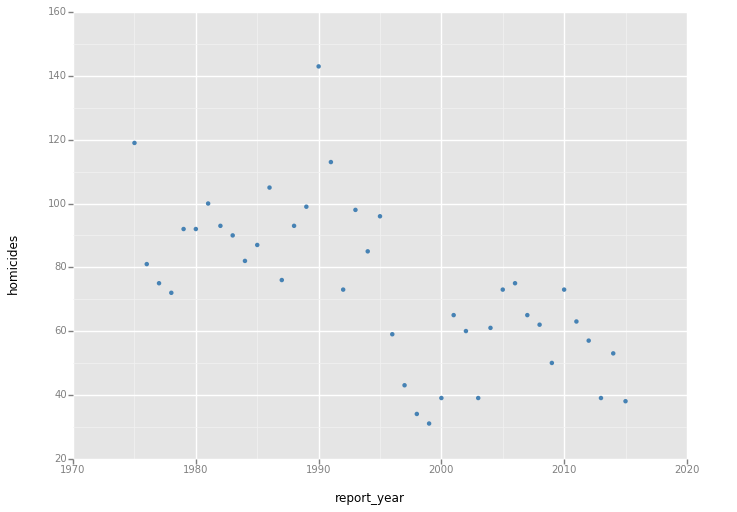

<ggplot: (294959345)>

In [22]:
ggplot(boston, aes('report_year', 'homicides')) + \
  geom_point(color='steelblue' )

In [23]:
boston.head()

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
7,1975,MA01301,"Boston, MA",616120.0,11386.0,119.0,453.0,3036.0,7778.0,12.0,1848.02,19.31,73.52,492.76,1262.42
76,1976,MA01301,"Boston, MA",619437.0,9888.0,81.0,392.0,3290.0,6125.0,12.0,1596.29,13.08,63.28,531.13,988.80
145,1977,MA01301,"Boston, MA",619321.0,9422.0,75.0,408.0,3284.0,5655.0,12.0,1521.34,12.11,65.88,530.26,913.10
214,1978,MA01301,"Boston, MA",616225.0,10035.0,72.0,475.0,3853.0,5635.0,12.0,1628.46,11.68,77.08,625.26,914.44
283,1979,MA01301,"Boston, MA",599582.0,11392.0,92.0,464.0,4236.0,6600.0,12.0,1899.99,15.34,77.39,706.49,1100.77


In [27]:
g = ggplot(boston, aes(x='petalLength',
                   y='petalWidth',
                   color='species')) + \
        facet_grid(y='species') + \
        geom_point(size=40.0)


Exception: Invalid column: 'species'
did you mean one of the following:


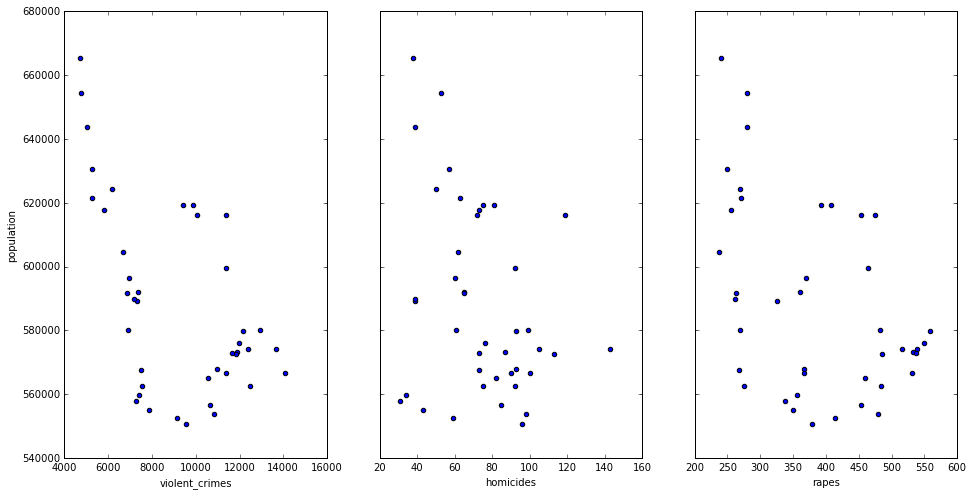

In [28]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
boston.plot(kind='scatter', x='violent_crimes', y='population', ax=axs[0], figsize=(16, 8))
boston.plot(kind='scatter', x='homicides', y='population', ax=axs[1])
boston.plot(kind='scatter', x='rapes', y='population', ax=axs[2])

In [29]:
boston.describe()

,report_year,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,40.0,41.000000,41.000000,41.000000,41.000000,41.000000
mean,1995.000000,588279.097561,9125.268293,74.219512,386.414634,4503.560976,4161.073171,12.0,1566.940000,12.708049,66.219512,773.929268,714.083902
std,11.979149,29684.868653,2724.111140,25.185822,104.738001,1132.580859,2045.385739,0.0,500.626672,4.515230,19.308529,218.196765,357.368717
min,1975.000000,550715.000000,4702.000000,31.000000,237.000000,2736.000000,1551.000000,12.0,706.790000,5.560000,36.080000,418.080000,233.140000
25%,1985.000000,566551.000000,6956.000000,59.000000,275.000000,3853.000000,2428.000000,12.0,1192.410000,10.060000,46.370000,625.260000,417.060000
50%,1995.000000,579921.000000,9422.000000,73.000000,369.000000,4376.000000,3597.000000,12.0,1596.290000,12.740000,64.460000,745.340000,653.150000
75%,2005.000000,616120.000000,11392.000000,92.000000,480.000000,5211.000000,5866.000000,12.0,2006.000000,16.040000,83.260000,943.130000,988.800000
max,2015.000000,665258.000000,14071.000000,143.000000,558.000000,6960.000000,9248.000000,12.0,2483.060000,24.900000,96.220000,1211.950000,1631.960000


In [34]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='population ~ homicides + violent_crimes + assaults + robberies', data=boston).fit()
lm.params


Intercept         660856.102330
homicides            318.992085
violent_crimes       226.003788
assaults            -257.801270
robberies           -239.739573
dtype: float64

In [36]:
# print a summary of the fitted model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             population   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     18.13
Date:                Tue, 18 Apr 2017   Prob (F-statistic):           3.09e-08
Time:                        16:57:44   Log-Likelihood:                -457.29
No. Observations:                  41   AIC:                             924.6
Df Residuals:                      36   BIC:                             933.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept       6.609e+05   1.26e+04     52.359      0.000      6.35e+05  6.86e+05
homicides        318.9921    193.955      1.645      0.109       -74.368   712.352
violent_crimes   226.0038     69.848      3.236      0.003        84.346   367.661
assaults        -257.8013     73.327     -3.516      0.001      -406.515  -109.088
robberies       -239.7396     72.544     -3.305      0.002      -386.866   -92.613
==============================================================================
Omnibus:                        1.982   Durbin-Watson:                   1.010
Prob(Omnibus):                  0.371   Jarque-Bera (JB):                1.762
Skew:                           0.491   Prob(JB):                        0.414
Kurtosis:                       2.745   Cond. No.                     5.14e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# New York City

In [81]:
new_york = new_york[((new_york['agency_jurisdiction'].str.contains("City")))]
new_york.head()

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
41,1975,NY03030,"New York City, NY",7422506.0,132182.0,1645.0,3866.0,43481.0,83190.0,12.0,1780.83,22.16,52.08,585.80,1120.78
110,1976,NY03030,"New York City, NY",7530493.0,134153.0,1622.0,3400.0,42948.0,86183.0,12.0,1781.46,21.54,45.15,570.32,1144.45
179,1977,NY03030,"New York City, NY",7481613.0,121916.0,1557.0,3899.0,42056.0,74404.0,12.0,1629.54,20.81,52.11,562.12,994.49
248,1978,NY03030,"New York City, NY",7242886.0,122685.0,1503.0,3882.0,43271.0,74029.0,12.0,1693.87,20.75,53.60,597.43,1022.09
317,1979,NY03030,"New York City, NY",7109420.0,132383.0,1733.0,3875.0,44203.0,82572.0,12.0,1862.08,24.38,54.51,621.75,1161.44


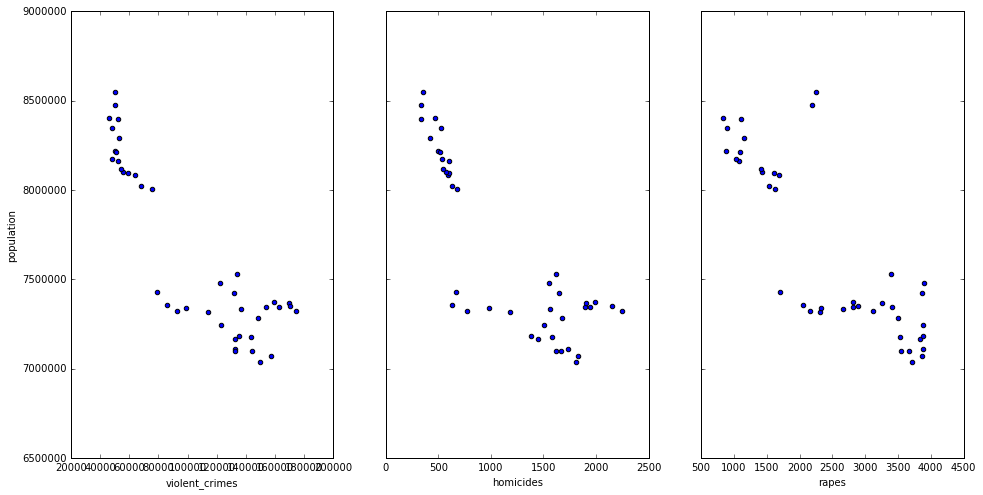

In [80]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
new_york.plot(kind='scatter', x='violent_crimes', y='population', ax=axs[0], figsize=(16, 8))
new_york.plot(kind='scatter', x='homicides', y='population', ax=axs[1])
new_york.plot(kind='scatter', x='rapes', y='population', ax=axs[2])

In [97]:
hawaii = state_df[10]
hawaii_pop= hawaii['population']
hawaii_ls = [population for population in hawaii_pop]
hawaii_ls[0]

705262.0

In [100]:
hawaii.head()

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
21,1975,HI00200,"Honolulu, HI",705262.0,1596.0,58.0,169.0,319.0,1050.0,12.0,226.30,8.22,23.96,45.23,148.88
90,1976,HI00200,"Honolulu, HI",718424.0,1696.0,40.0,164.0,380.0,1112.0,12.0,236.07,5.57,22.83,52.89,154.78
159,1977,HI00200,"Honolulu, HI",721983.0,1660.0,46.0,176.0,357.0,1081.0,12.0,229.92,6.37,24.38,49.45,149.73
228,1978,HI00200,"Honolulu, HI",725259.0,2044.0,38.0,187.0,346.0,1473.0,12.0,281.83,5.24,25.78,47.71,203.10
297,1979,HI00200,"Honolulu, HI",734368.0,2196.0,48.0,223.0,357.0,1568.0,12.0,299.03,6.54,30.37,48.61,213.52


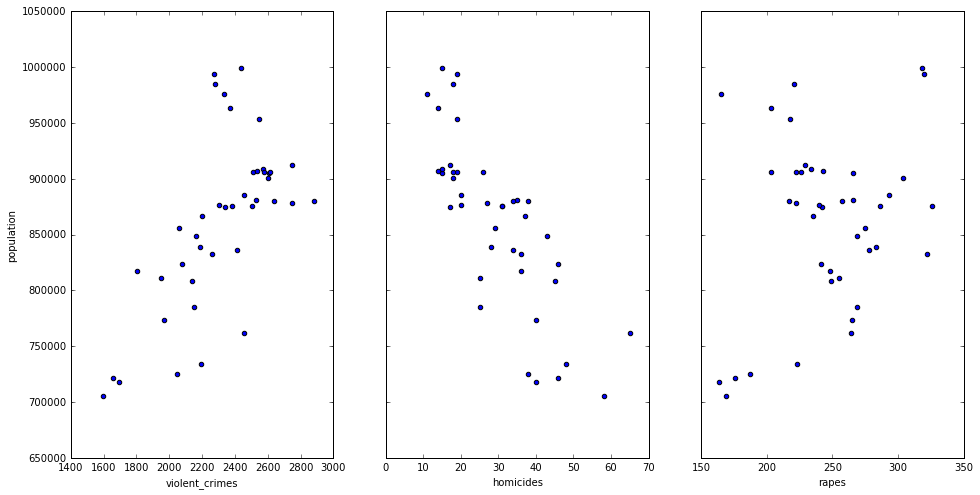

In [99]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
hawaii.plot(kind='scatter', x='violent_crimes', y='population', ax=axs[0], figsize=(16, 8))
hawaii.plot(kind='scatter', x='homicides', y='population', ax=axs[1])
hawaii.plot(kind='scatter', x='rapes', y='population', ax=axs[2])